**Phishing URL Detection Using Machine Learning**


---> **Objective**

The primary objective of this project is to develop a machine learning-based system to detect phishing URLs by analyzing various syntactic and structural features extracted from web addresses. The system aims to distinguish between legitimate and phishing websites using automated learning techniques, contributing to cybersecurity defenses.


---> **Aim**

To build a robust and interpretable model that can classify URLs into
phishing or benign categories.

To perform comprehensive data preprocessing for feature transformation, handling outliers, reducing skewness, and standardizing the dataset to ensure optimal model performance.

To use real-world data (PhiUSIIL dataset) and extract meaningful patterns from URL characteristics like: URL length, Number of JavaScript/CSS/Image tags,TLD (Top-Level Domain),Domain structure and encoding patterns.






---> **Significance of the Project**


Cybersecurity Relevance: Phishing attacks remain one of the most widespread cyber threats. Detecting phishing URLs at scale helps prevent financial fraud, identity theft, and malware distribution.

Automation: Manual inspection of suspicious URLs is infeasible at web-scale. Machine learning enables real-time detection with high accuracy.

Interpretability: By analyzing handcrafted features (rather than only relying on black-box deep models), the system offers insights into why a URL is flagged as phishing.



---> **Importance of Preprocessing in Machine Learning**


In machine learning, data preprocessing is a foundational step that significantly influences model performance, accuracy, and generalizability. Raw data collected from real-world sources is often noisy, inconsistent, skewed, or incomplete. Preprocessing transforms this raw input into a clean, structured and meaningful format by handling missing values, removing outliers, scaling numerical features, encoding categorical variables, and reducing skewness. These steps ensure that the learning algorithms can focus on relevant patterns without being misled by anomalies or scale differences. Without proper preprocessing, even the most advanced algorithms can yield poor results, as models may overfit noise or fail to converge effectively. Thus, preprocessing bridges the gap between raw data and effective learning, making it an essential part of any machine learning pipeline.



**Preprocessing of Dataset: Keysteps invloved-**

Importing of dataset

In [37]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv('PhiUSIIL_Phishing_URL_Dataset.csv')


Saving PhiUSIIL_Phishing_URL_Dataset.csv to PhiUSIIL_Phishing_URL_Dataset.csv


Quality check on the dataset: preview and eliminating duplicate values, handling null values and outliers

In [2]:
# Overview of structure, types, and non-null counts
print(" Data Info:")
df.info()

#  First few rows
print("\n Preview of Data:")
display(df.head())


# Check for duplicate columns
duplicate_columns = df.T[df.T.duplicated()].T

print(f"Number of duplicate columns: {duplicate_columns.shape[1]}")
if duplicate_columns.shape[1] > 0:
    print("Duplicate columns found:")
    print(duplicate_columns.columns.tolist())
else:
    print("✅ No duplicate columns found.")





 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  Ha

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


Number of duplicate columns: 0
✅ No duplicate columns found.


| Feature           | Mean  | Max   | Min | Std Dev |
| ----------------- | ----- | ----- | --- | ------- |
| `URLLength`       | 34.57 | 6097  | 13  | 41.31   |
| `NoOfImage`       | 26.07 | 8956  | 0   | 79.41   |
| `NoOfJS`          | 10.52 | 6957  | 0   | 22.31   |
| `NoOfSelfRef`     | 65.07 | 27397 | 0   | 176.69  |
| `NoOfExternalRef` | 49.26 | 27516 | 0   | 161.03  |
 So using box plots and Normalization methods to overcome these large gaps in statistical values. Difference from mean to max values is very high in these cases.

Checking the statistical parameters supporting a robust dataset

In [3]:
# Summary statistics for numeric columns
print("\n Summary Statistics:")
display(df.describe())

#  Null value count per column
print("\n Null Values Per Column:")
null_counts = df.isnull().sum()
display(null_counts[null_counts > 0].sort_values(ascending=False))



#  Percentage of nulls
print("\n Null Value Percentages:")
null_percent = (df.isnull().mean() * 100).sort_values(ascending=False)
display(null_percent[null_percent > 0])



 Summary Statistics:


,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000



 Null Values Per Column:


,0



 Null Value Percentages:


,0


Anaysing the data and outlier concentration through Box Plot

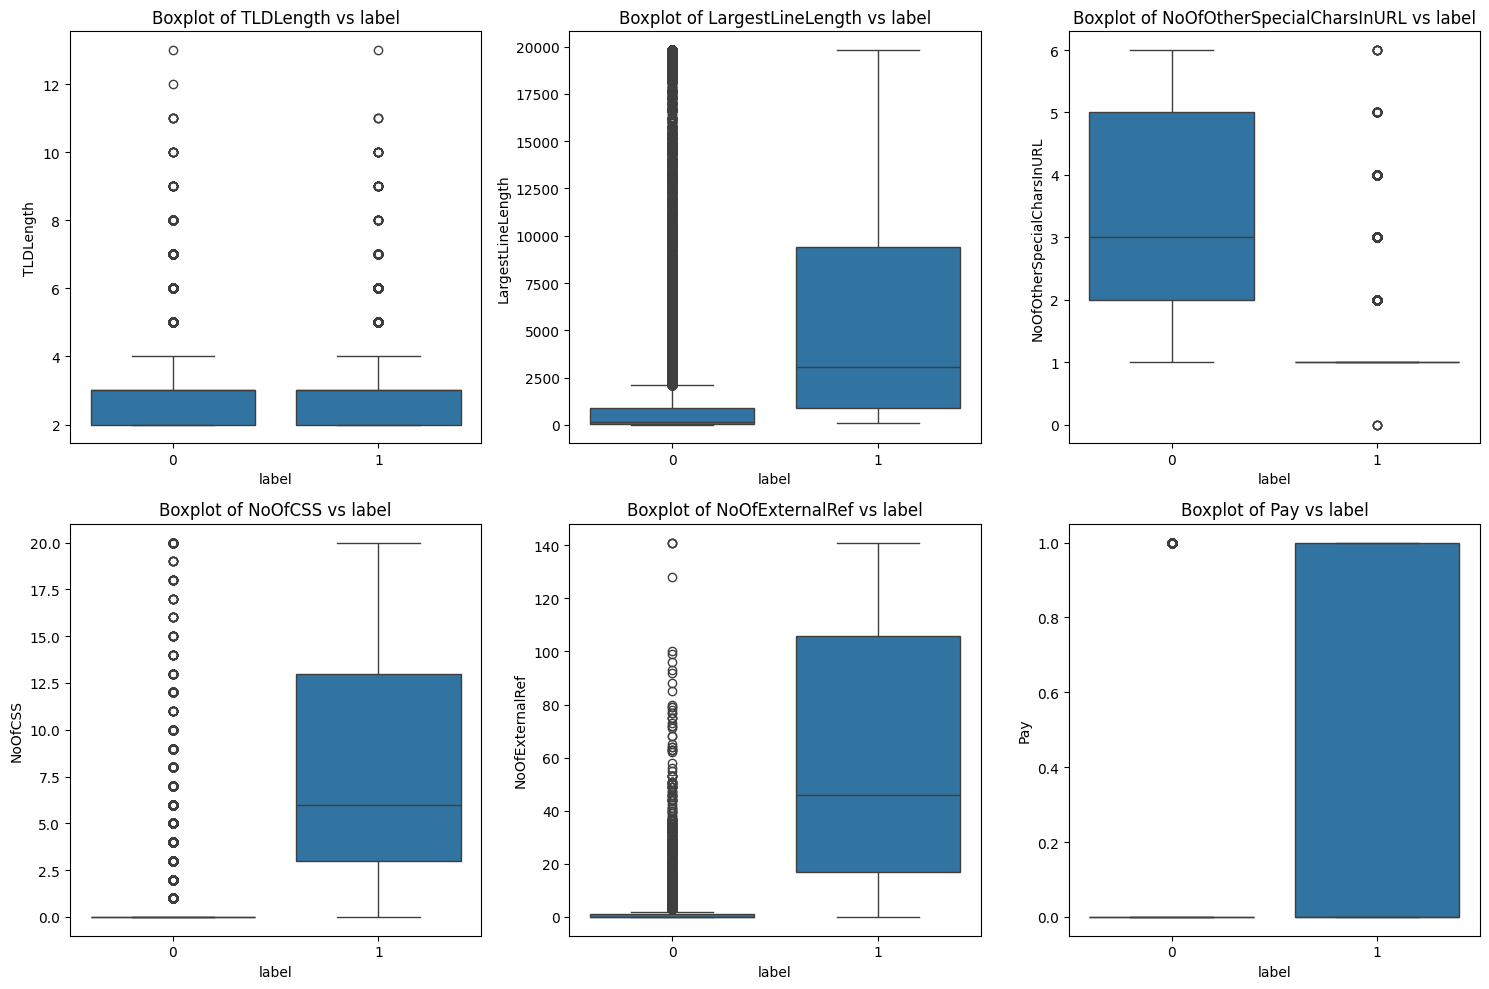

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#  Plot boxplots of most skewed features
top_skewed = skew_scores.head(6).index.tolist()  # Take top 6 for plotting

plt.figure(figsize=(15, 10))
for i, col in enumerate(top_skewed, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='label', y=col, data=df)
    plt.title(f'Boxplot of {col} vs label')
    plt.tight_layout()

plt.show()

Common outlier handling method: upon checking skewness and bringing it to required range by scaling and normalising.

IQR = Interquartile Range
It measures the spread of the middle 50% of the data:

IQR
=
𝑄
3
−
𝑄
1
IQR=Q3−Q1
Where:

Q1 (25th percentile) = value below which 25% of the data falls

Q3 (75th percentile) = value below which 75% of the data falls.


We use IQR to identify outliers:

Any value below Q1 − 1.5×IQR → is an outlier

Any value above Q3 + 1.5×IQR → is an outlier

This is the foundation of boxplots. The box itself is the IQR, and whiskers are up to those bounds. Points beyond are plotted as circles (outliers).



Check the skewness of the raw dataset for various features.

In [7]:
import pandas as pd

# Step 1: Select only numeric features (excluding label)
num_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns='label')

# Step 2: Compute skewness
skew_scores = num_cols.skew().sort_values(ascending=False)

# Step 3: Get top 30 most skewed features
top_30_skewed = skew_scores.head(30).index.tolist()

print("Top 30 Most Skewed Features:\n")
for i, feature in enumerate(top_30_skewed, 1):
    print(f"{i}. {feature} (Skewness: {skew_scores[feature]:.2f})")


Top 30 Most Skewed Features:

1. TLDLength (Skewness: 1.66)
2. LargestLineLength (Skewness: 1.45)
3. NoOfOtherSpecialCharsInURL (Skewness: 1.43)
4. NoOfCSS (Skewness: 1.30)
5. NoOfExternalRef (Skewness: 1.24)
6. Pay (Skewness: 1.24)
7. NoOfSelfRef (Skewness: 1.22)
8. LineOfCode (Skewness: 1.22)
9. NoOfImage (Skewness: 1.19)
10. SpacialCharRatioInURL (Skewness: 1.18)
11. NoOfEmptyRef (Skewness: 1.18)
12. NoOfJS (Skewness: 1.14)
13. NoOfiFrame (Skewness: 1.06)
14. Robots (Skewness: 1.06)
15. URLLength (Skewness: 1.01)
16. NoOfLettersInURL (Skewness: 0.93)
17. DomainLength (Skewness: 0.64)
18. HasFavicon (Skewness: 0.58)
19. HasHiddenFields (Skewness: 0.50)
20. HasSubmitButton (Skewness: 0.35)
21. HasDescription (Skewness: 0.24)
22. HasSocialNet (Skewness: 0.17)
23. TLDLegitimateProb (Skewness: 0.07)
24. HasCopyrightInfo (Skewness: 0.05)
25. NoOfDegitsInURL (Skewness: 0.00)
26. NoOfAmpersandInURL (Skewness: 0.00)
27. IsDomainIP (Skewness: 0.00)
28. NoOfObfuscatedChar (Skewness: 0.00)
29. 

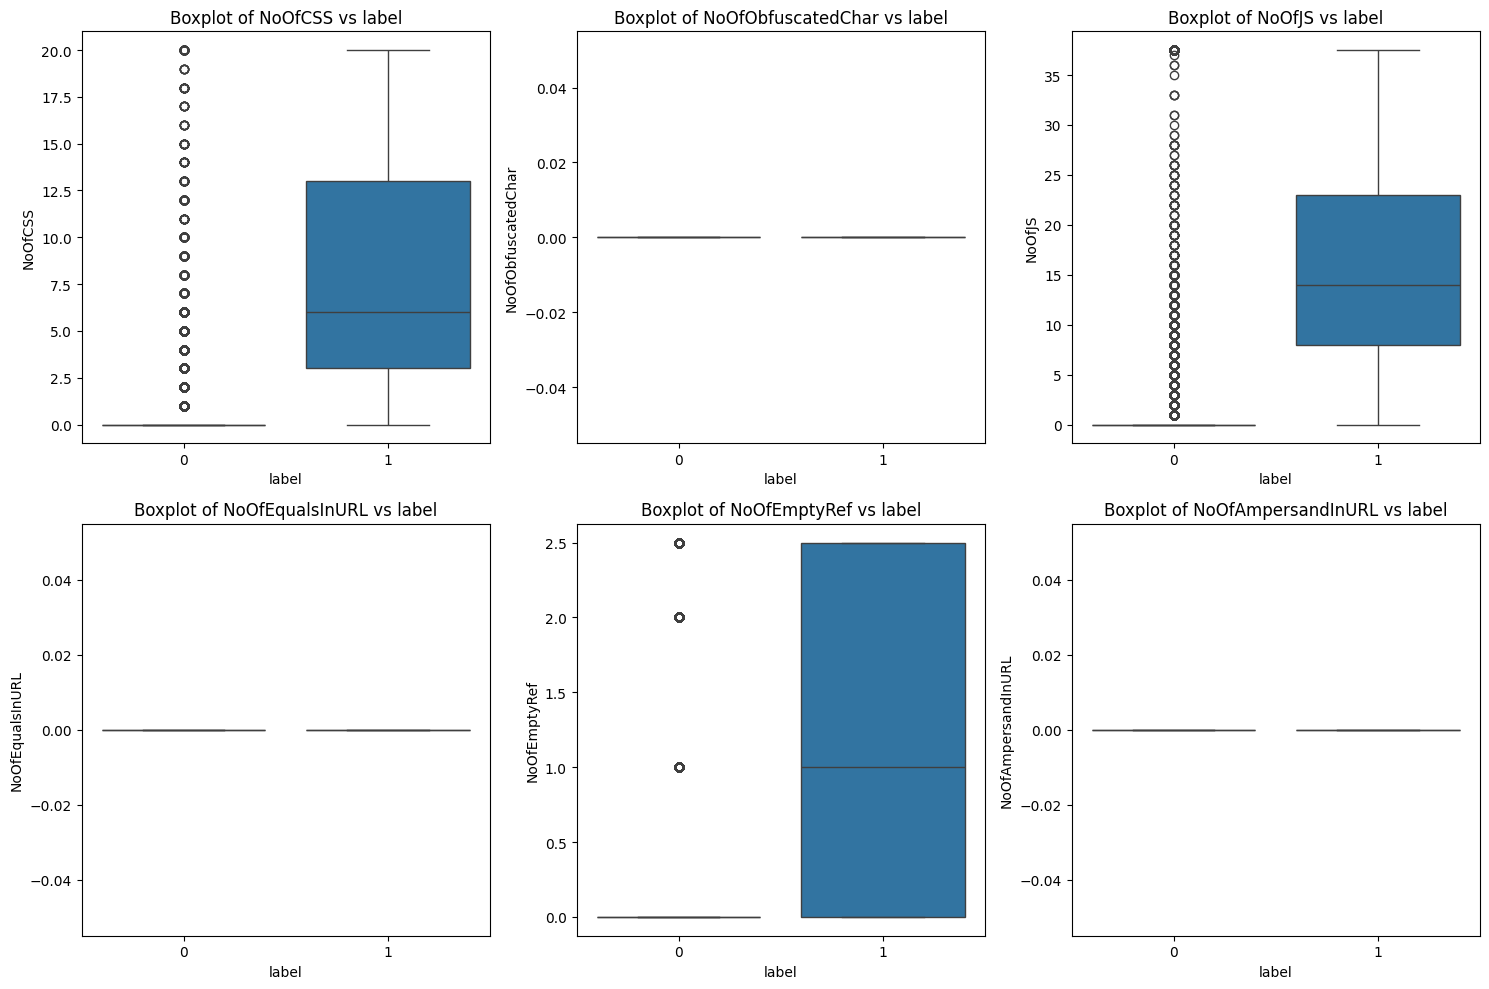

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Drop non-numeric & label for skewness calc
num_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns='label')



#  Plot boxplots of most skewed features
top_skewed = skew_scores.head(6).index.tolist()  # Take top 6 for plotting

plt.figure(figsize=(15, 10))
for i, col in enumerate(top_skewed, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='label', y=col, data=df)
    plt.title(f'Boxplot of {col} vs label')
    plt.tight_layout()

plt.show()

Comparison of raw vs clipped data after IQR method

--constant values might not lead to proper learning. So fetaure selection is being enabled through preprocessing here.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load dataset and deep copy for reference
df = pd.read_csv('PhiUSIIL_Phishing_URL_Dataset.csv')
original_df = df.copy(deep=True)

# Step 2: Select numeric columns (excluding label)
num_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns='label')

# Step 3: Calculate skewness and get top 30 skewed features
skew_scores = num_cols.skew().sort_values(ascending=False)
top_30_skewed = skew_scores.head(30).index.tolist()

# Step 4: IQR Clipping
valid_features = []
print(" Clipping Summary:\n")
for col in top_30_skewed:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = max(Q1 - 1.5 * IQR, 0)  # avoid negative for count-based
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower, upper=upper)

    if df[col].nunique() > 1:
        valid_features.append(col)
        print(f"{col}: Clipped to [{lower:.2f}, {upper:.2f}] ")
    else:
        print(f"{col}: Clipped to [{lower:.2f}, {upper:.2f}]  dropped (constant)")

print(f"\n Total usable features after clipping: {len(valid_features)}")
print("Usable features:\n", valid_features)

# Step 5: Skewness comparison before vs after clipping
skew_before = original_df[valid_features].skew().sort_values(ascending=False)
skew_after = df[valid_features].skew().sort_values(ascending=False)

skew_comparison = pd.DataFrame({
    'Skewness Before': skew_before,
    'Skewness After': skew_after
}).sort_values(by='Skewness Before', ascending=False)

# Display final result
print("\n Skewness Comparison (Before vs After Clipping):")
print(skew_comparison.round(2))


 Clipping Summary:

NoOfCSS: Clipped to [0.00, 20.00] 
NoOfObfuscatedChar: Clipped to [0.00, 0.00]  dropped (constant)
NoOfJS: Clipped to [0.00, 37.50] 
NoOfEqualsInURL: Clipped to [0.00, 0.00]  dropped (constant)
NoOfEmptyRef: Clipped to [0.00, 2.50] 
NoOfAmpersandInURL: Clipped to [0.00, 0.00]  dropped (constant)
NoOfiFrame: Clipped to [0.00, 2.50] 
NoOfDegitsInURL: Clipped to [0.00, 0.00]  dropped (constant)
NoOfPopup: Clipped to [0.00, 0.00]  dropped (constant)
NoOfExternalRef: Clipped to [0.00, 141.00] 
NoOfSelfRef: Clipped to [0.00, 220.00] 
NoOfLettersInURL: Clipped to [0.00, 35.00] 
URLLength: Clipped to [6.50, 50.50] 
LineOfCode: Clipped to [0.00, 3165.50] 
LargestLineLength: Clipped to [0.00, 19817.50] 
NoOfOtherSpecialCharsInURL: Clipped to [0.00, 6.00] 
ObfuscationRatio: Clipped to [0.00, 0.00]  dropped (constant)
NoOfImage: Clipped to [0.00, 72.50] 
HasObfuscation: Clipped to [0.00, 0.00]  dropped (constant)
IsDomainIP: Clipped to [0.00, 0.00]  dropped (constant)
NoOfQMark

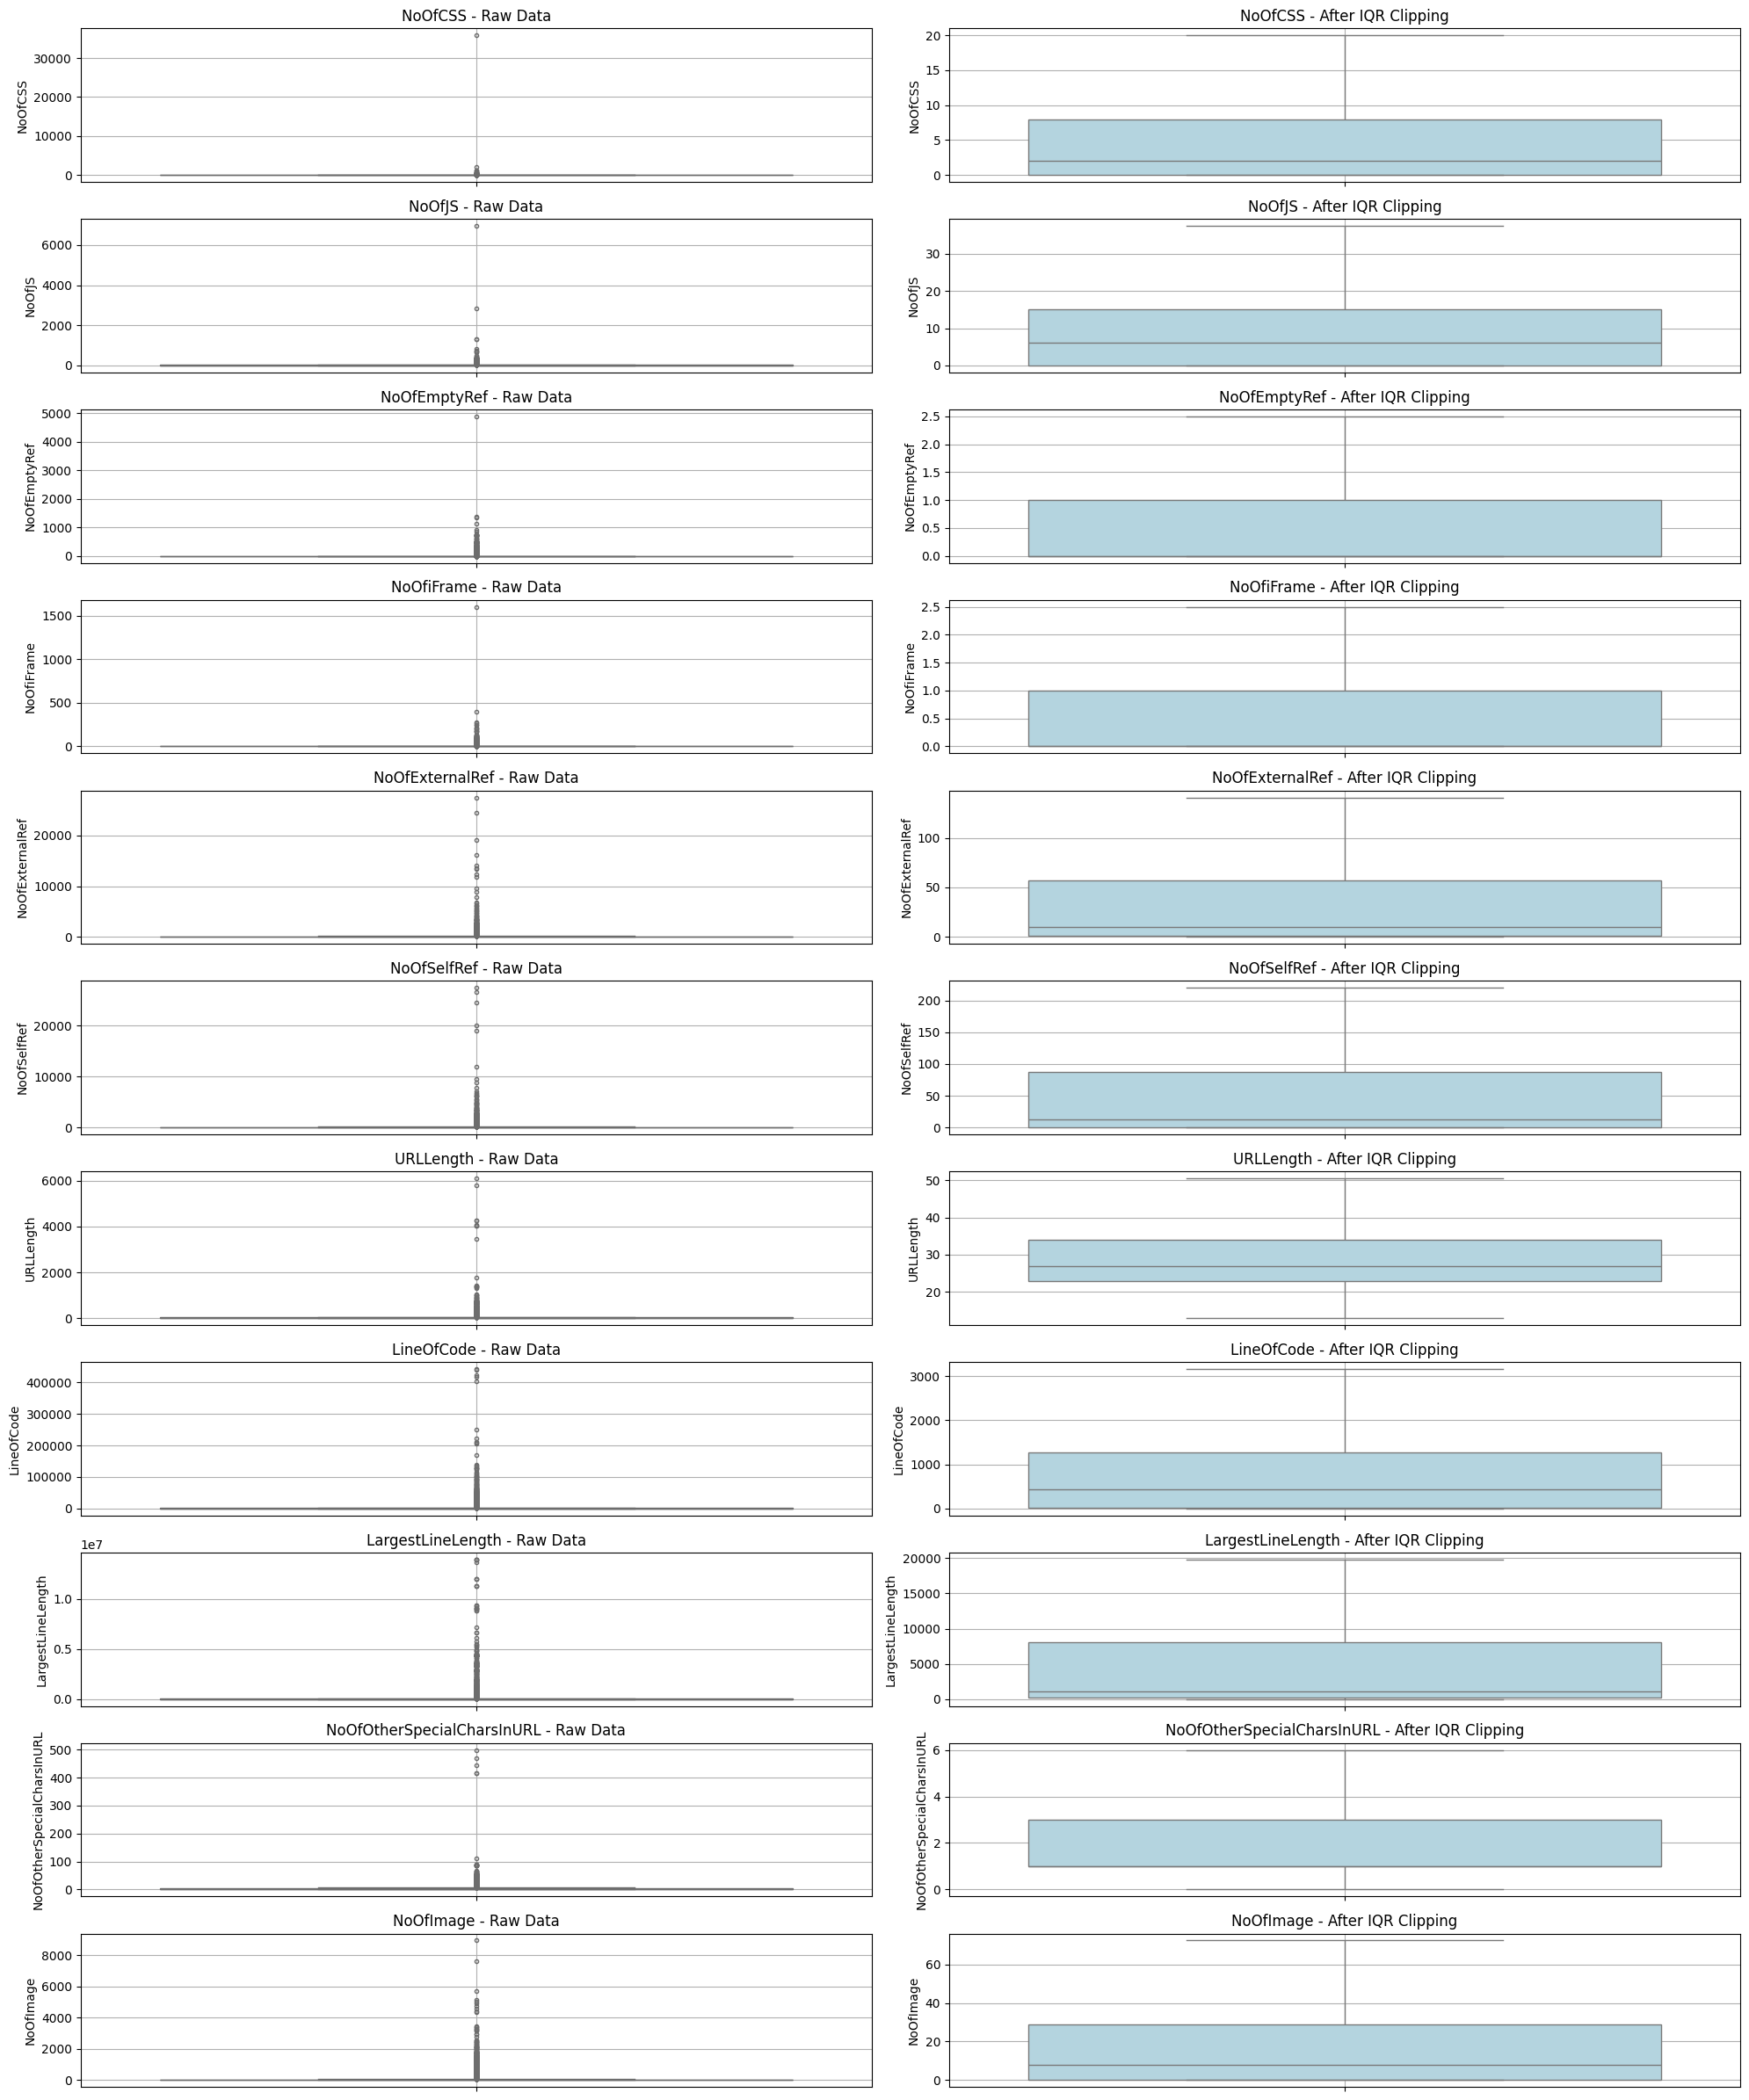

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Features you applied clipping to
compare_features = [
    'NoOfCSS', 'NoOfJS', 'NoOfEmptyRef', 'NoOfiFrame',
    'NoOfExternalRef', 'NoOfSelfRef', 'URLLength',
    'LineOfCode', 'LargestLineLength',
    'NoOfOtherSpecialCharsInURL', 'NoOfImage'
]



clipped_df = df.copy()

plt.figure(figsize=(20, 24))
for i, col in enumerate(compare_features):
    plt.subplot(len(compare_features), 2, 2*i + 1)
    sns.boxplot(y=original_df[col], color='salmon', fliersize=3)
    plt.title(f"{col} - Raw Data")
    plt.grid(True)

    plt.subplot(len(compare_features), 2, 2*i + 2)
    sns.boxplot(y=clipped_df[col], color='lightblue', fliersize=3)
    plt.title(f"{col} - After IQR Clipping")
    plt.grid(True)

plt.tight_layout()
plt.show()


Desired skew results are yet to be obtained. So moving on with further preprocessing. Logarithmic transformation is being used.

In [10]:


# Step: Apply log1p only to features with skewness > 1
print("\n Applying log1p only to features with skew > 1 ...\n")
log_transformed_cols = []

skew_before_log = {}
skew_after_log = {}

for col in valid_features:
    skew_val = df[col].skew()
    if skew_val > 1:
        skew_before_log[col] = skew_val
        df[col] = np.log1p(df[col])  # log(1 + x)
        skew_after_log[col] = df[col].skew()
        log_transformed_cols.append(col)

# Step: Create comparison DataFrame
log_skew_comparison = pd.DataFrame({
    'Skewness Before Log': pd.Series(skew_before_log),
    'Skewness After Log': pd.Series(skew_after_log)
}).sort_values(by='Skewness Before Log', ascending=False)

# Display result
print(" Skewness Comparison (Only Log-Transformed Columns):")
print(log_skew_comparison.round(2))

print(f"\n Total columns log-transformed: {len(log_transformed_cols)}")
print("Transformed columns:\n", log_transformed_cols)



 Applying log1p only to features with skew > 1 ...

 Skewness Comparison (Only Log-Transformed Columns):
                            Skewness Before Log  Skewness After Log
LargestLineLength                          1.45               -0.16
NoOfOtherSpecialCharsInURL                 1.43                1.00
NoOfCSS                                    1.30                0.29
NoOfExternalRef                            1.24                0.06
NoOfSelfRef                                1.22                0.07
LineOfCode                                 1.22               -0.58
NoOfImage                                  1.19                0.00
NoOfEmptyRef                               1.18                1.03
NoOfJS                                     1.14               -0.03
NoOfiFrame                                 1.06                0.90
URLLength                                  1.01                0.54

 Total columns log-transformed: 11
Transformed columns:
 ['NoOfCSS', 'NoOfJS'

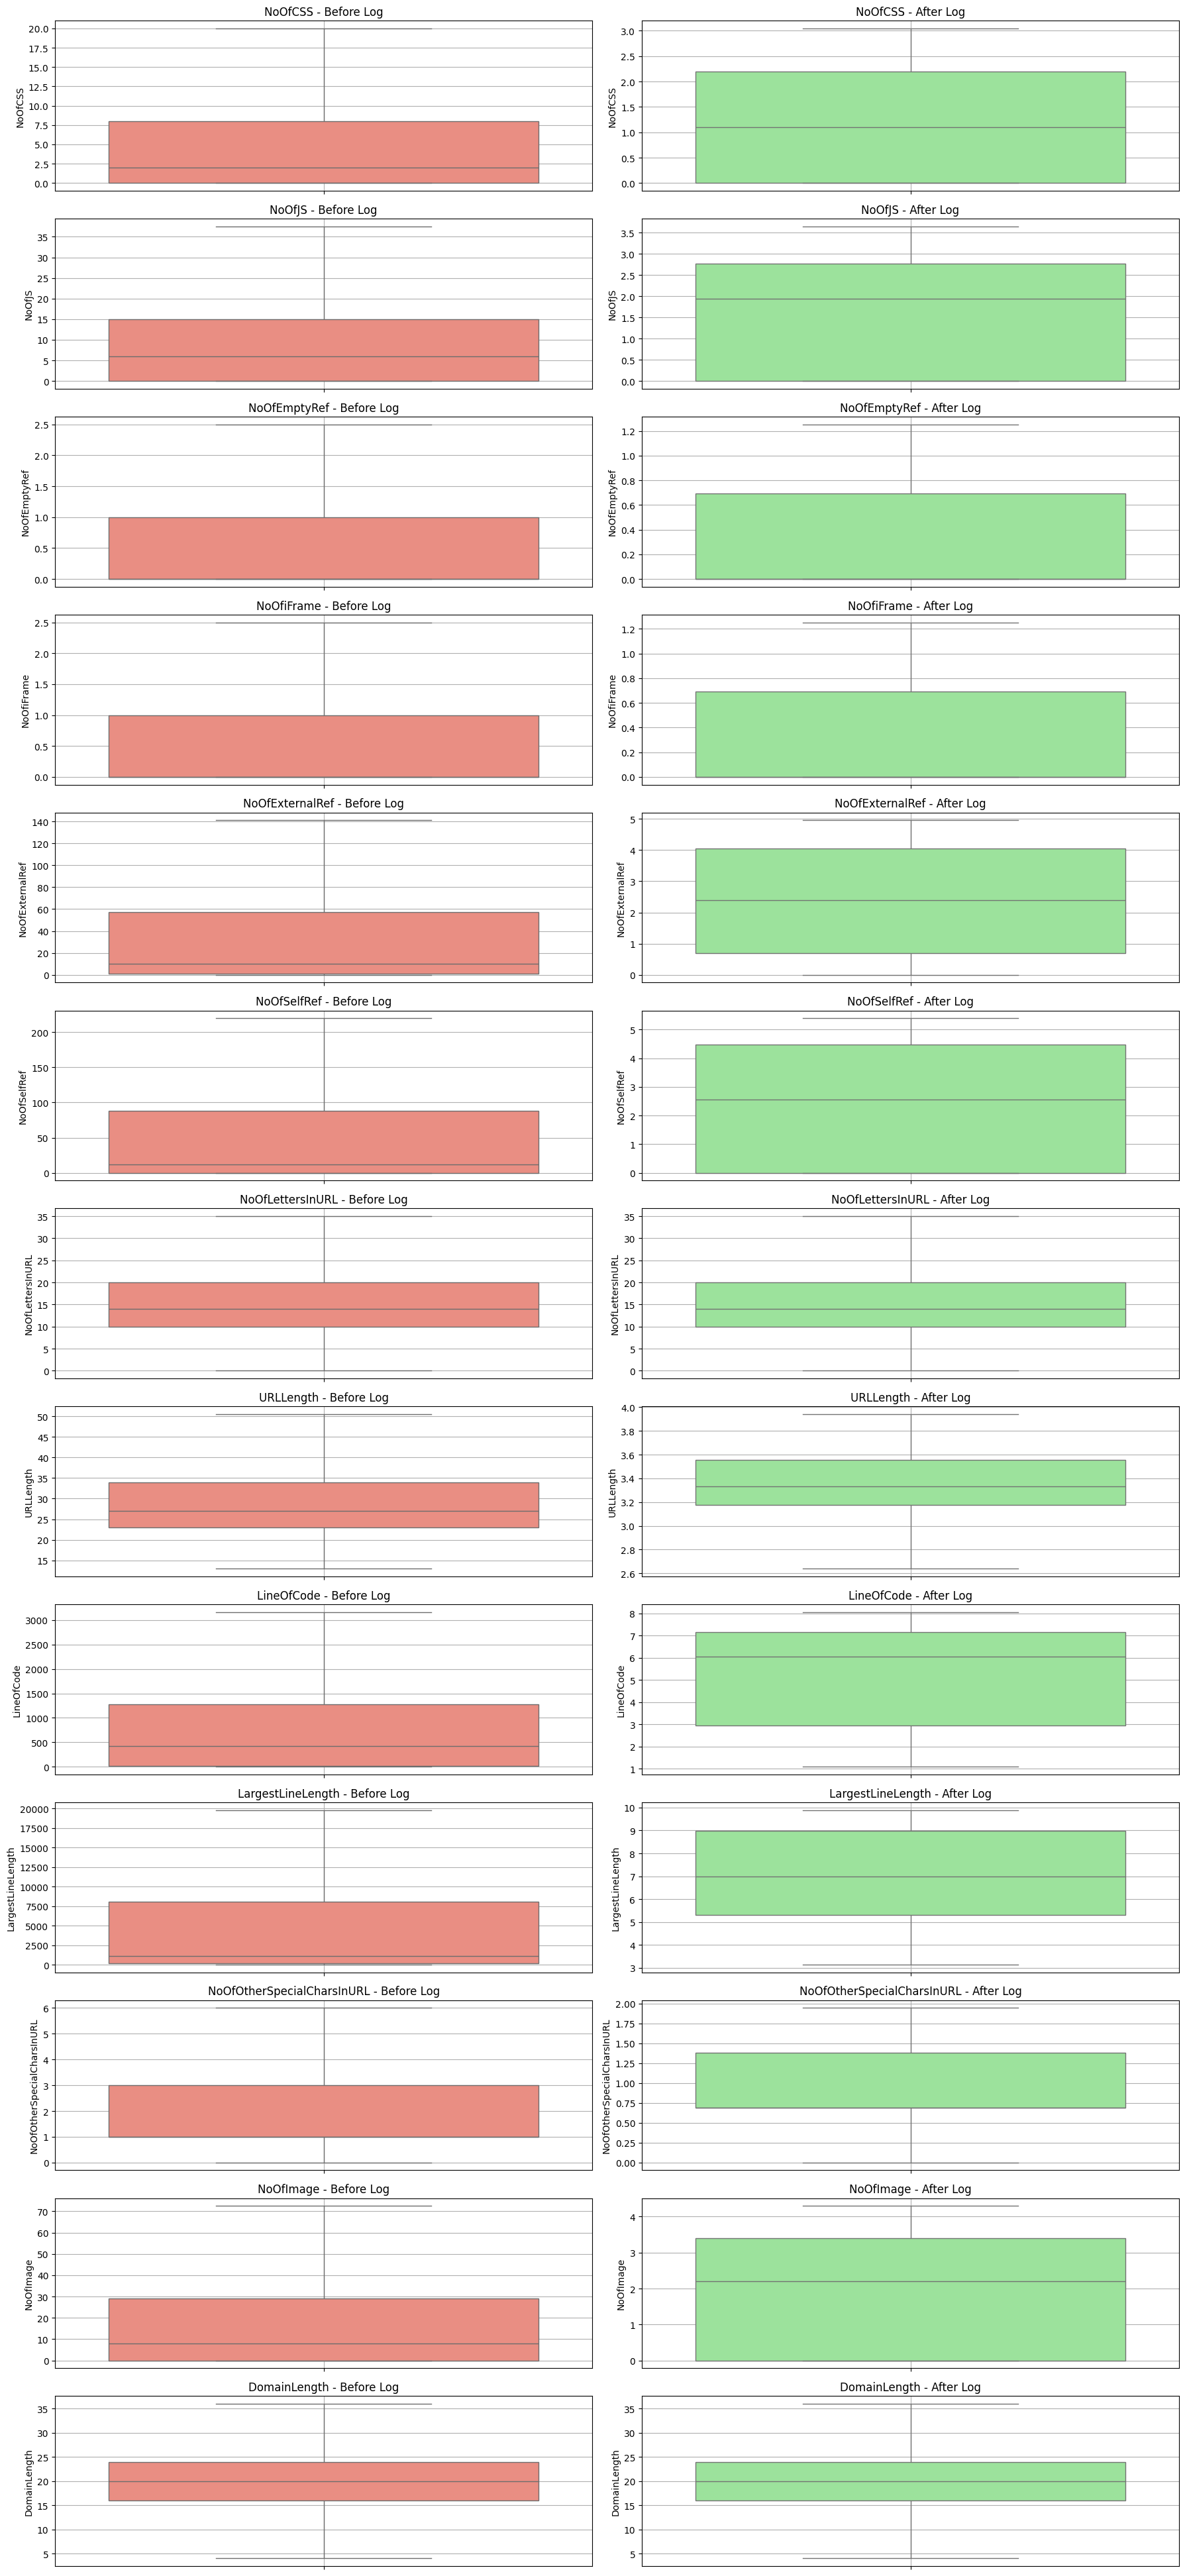

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Recreate clipped version (before log)
clipped_df = original_df[valid_features].copy()
for col in valid_features:
    Q1 = clipped_df[col].quantile(0.25)
    Q3 = clipped_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = max(Q1 - 1.5 * IQR, 0)
    upper = Q3 + 1.5 * IQR
    clipped_df[col] = clipped_df[col].clip(lower=lower, upper=upper)

# comparing before and after log plots
plt.figure(figsize=(18, len(valid_features) * 3))

for i, col in enumerate(valid_features):
    # Left: Before log
    plt.subplot(len(valid_features), 2, 2 * i + 1)
    sns.boxplot(y=clipped_df[col], color='salmon', fliersize=2)
    plt.title(f'{col} - Before Log')
    plt.grid(True)

    # Right: After log
    plt.subplot(len(valid_features), 2, 2 * i + 2)
    sns.boxplot(y=df[col], color='lightgreen', fliersize=2)
    plt.title(f'{col} - After Log')
    plt.grid(True)

plt.tight_layout()
plt.show()


The categorical columns need to be converted into numerical columns and the process is termed as one hot encoding where labelling done seperately. Here the 5 objects during the initial inspection was found and it is undergoing One hot encoding.

In [12]:
# One-hot encode only the useful categorical column
one_hot = pd.get_dummies(df['TLD'], prefix='TLD')

# Concatenate to main dataframe
df_encoded = pd.concat([df, one_hot], axis=1)

# Drop the original categorical columns (and irrelevant ones)
df_encoded.drop(columns=['FILENAME', 'URL', 'Domain', 'Title', 'TLD'], inplace=True)

# Final structure
print(" Final dataframe shape after one-hot encoding:", df_encoded.shape)
df_encoded.head()


 Final dataframe shape after one-hot encoding: (235795, 746)


,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,TLD_xyz,TLD_yachts,TLD_ye,TLD_yoga,TLD_youtube,TLD_yt,TLD_za,TLD_zm,TLD_zone,TLD_zw
0,3.465736,24,0,100.0,1.000000,0.522907,0.061933,3,1,0,...,False,False,False,False,False,False,False,False,False,False
1,3.178054,16,0,100.0,0.666667,0.032650,0.050207,2,1,0,...,False,False,False,False,False,False,False,False,False,False
2,3.401197,22,0,100.0,0.866667,0.028555,0.064129,2,1,0,...,False,False,False,False,False,False,False,False,False,False
3,3.295837,19,0,100.0,1.000000,0.522907,0.057606,3,1,0,...,False,False,False,False,False,False,False,False,False,False
4,3.526361,26,0,100.0,1.000000,0.079963,0.059441,3,1,0,...,False,False,False,False,False,False,False,False,False,False


In [13]:
from sklearn.preprocessing import StandardScaler

# Define which columns to scale
columns_to_scale = log_transformed_cols  # the 11 log-transformed numeric features
scaler = StandardScaler()

# Apply scaling only on those columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


After these steps, standarding the required features into a general layout is essential for a smooth curve balance.So z score method is used and the statistaical parameter change is analysed.

In [14]:
# Before scaling (on log-transformed, clipped data)
before_stats = original_df[columns_to_scale].describe().loc[['mean', 'std']].T
before_stats.columns = ['Mean Before', 'Std Before']

# After scaling
after_stats = df[columns_to_scale].describe().loc[['mean', 'std']].T
after_stats.columns = ['Mean After', 'Std After']

# Combine and display
stats_comparison = pd.concat([before_stats, after_stats], axis=1)
print("\n Z-Score Normalization Comparison (Mean & Std):")
display(stats_comparison.round(3))



 Z-Score Normalization Comparison (Mean & Std):


,Mean Before,Std Before,Mean After,Std After
NoOfCSS,6.333,74.866,0.0,1.0
NoOfJS,10.522,22.312,-0.0,1.0
NoOfEmptyRef,2.378,17.641,-0.0,1.0
NoOfiFrame,1.589,5.763,-0.0,1.0
NoOfExternalRef,49.263,161.027,-0.0,1.0
NoOfSelfRef,65.071,176.688,0.0,1.0
URLLength,34.573,41.314,-0.0,1.0
LineOfCode,1141.900,3419.951,0.0,1.0
LargestLineLength,12789.533,152201.099,0.0,1.0
NoOfOtherSpecialCharsInURL,2.340,3.528,0.0,1.0


KDE plots after Z score evaluation

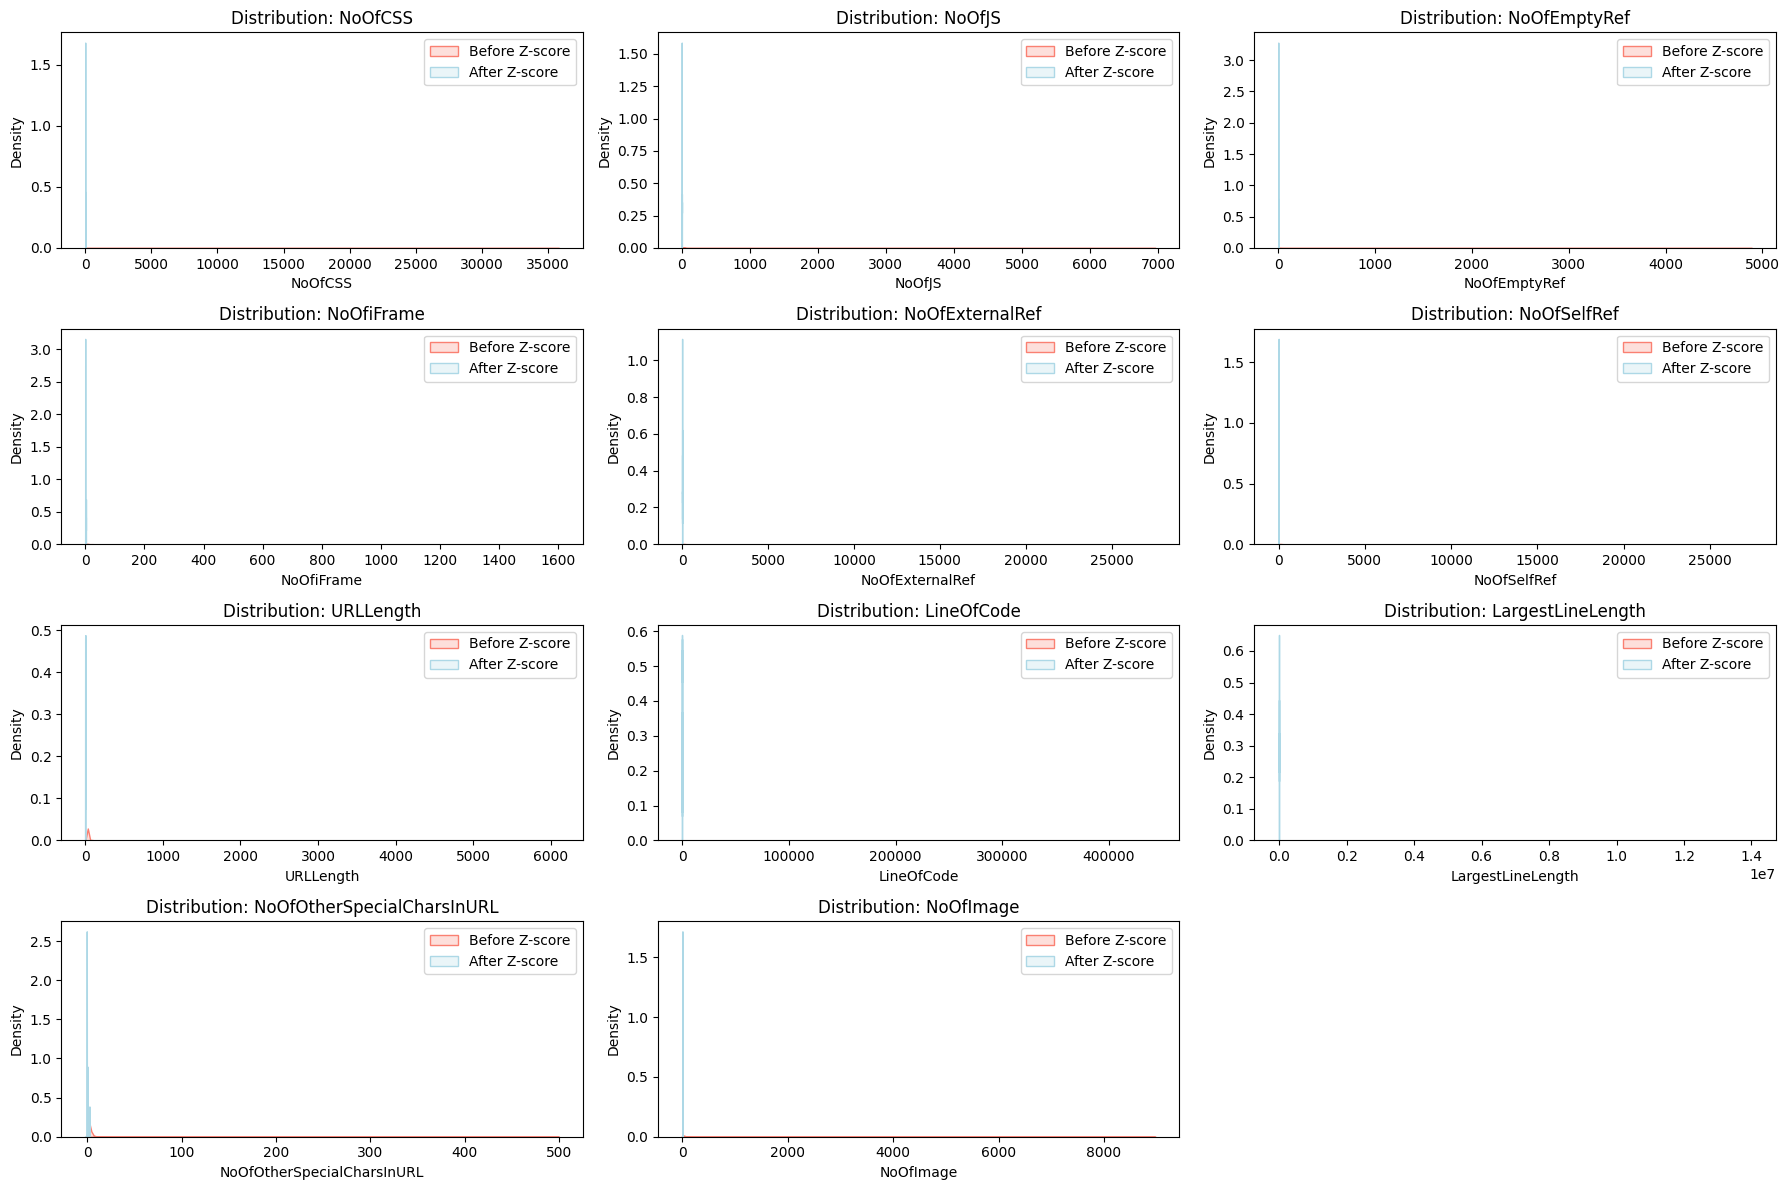

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 12))
for i, col in enumerate(columns_to_scale):
    plt.subplot(4, 3, i + 1)

    sns.kdeplot(original_df[col], label='Before Z-score', fill=True, color='salmon')

    sns.kdeplot(df[col], label='After Z-score', fill=True, color='lightblue')

    plt.title(f'Distribution: {col}')
    plt.legend()
    plt.tight_layout()

plt.show()


In [16]:
# Final Preprocessing Checks and Confirmation

# 1. Check for missing values
missing_values = df.isnull().sum().sum()
print(f" Total missing values in dataset: {missing_values}")

# 2. Ensure label is integer
df['label'] = df['label'].astype(int)
print(" 'label' column converted to integer.")

# 3. Print shape of final DataFrame
print(f" Final shape of dataset (rows, columns): {df.shape}")

# 4. Preview final dataset
print("\n First few rows of final dataset:")
print(df.head())


 Total missing values in dataset: 0
 'label' column converted to integer.
 Final shape of dataset (rows, columns): (235795, 56)

 First few rows of final dataset:
     FILENAME                                 URL  URLLength  \
0  521848.txt    https://www.southbankmosaics.com   0.241712   
1   31372.txt            https://www.uni-mainz.de  -0.794882   
2  597387.txt      https://www.voicefmradio.co.uk   0.009162   
3  554095.txt         https://www.sfnmjournal.com  -0.370479   
4  151578.txt  https://www.rewildingargentina.org   0.460158   

                       Domain  DomainLength  IsDomainIP  TLD  \
0    www.southbankmosaics.com            24           0  com   
1            www.uni-mainz.de            16           0   de   
2      www.voicefmradio.co.uk            22           0   uk   
3         www.sfnmjournal.com            19           0  com   
4  www.rewildingargentina.org            26           0  org   

   URLSimilarityIndex  CharContinuationRate  TLDLegitimateProb  ...

Comparison of box plots on raw vs processed dataset

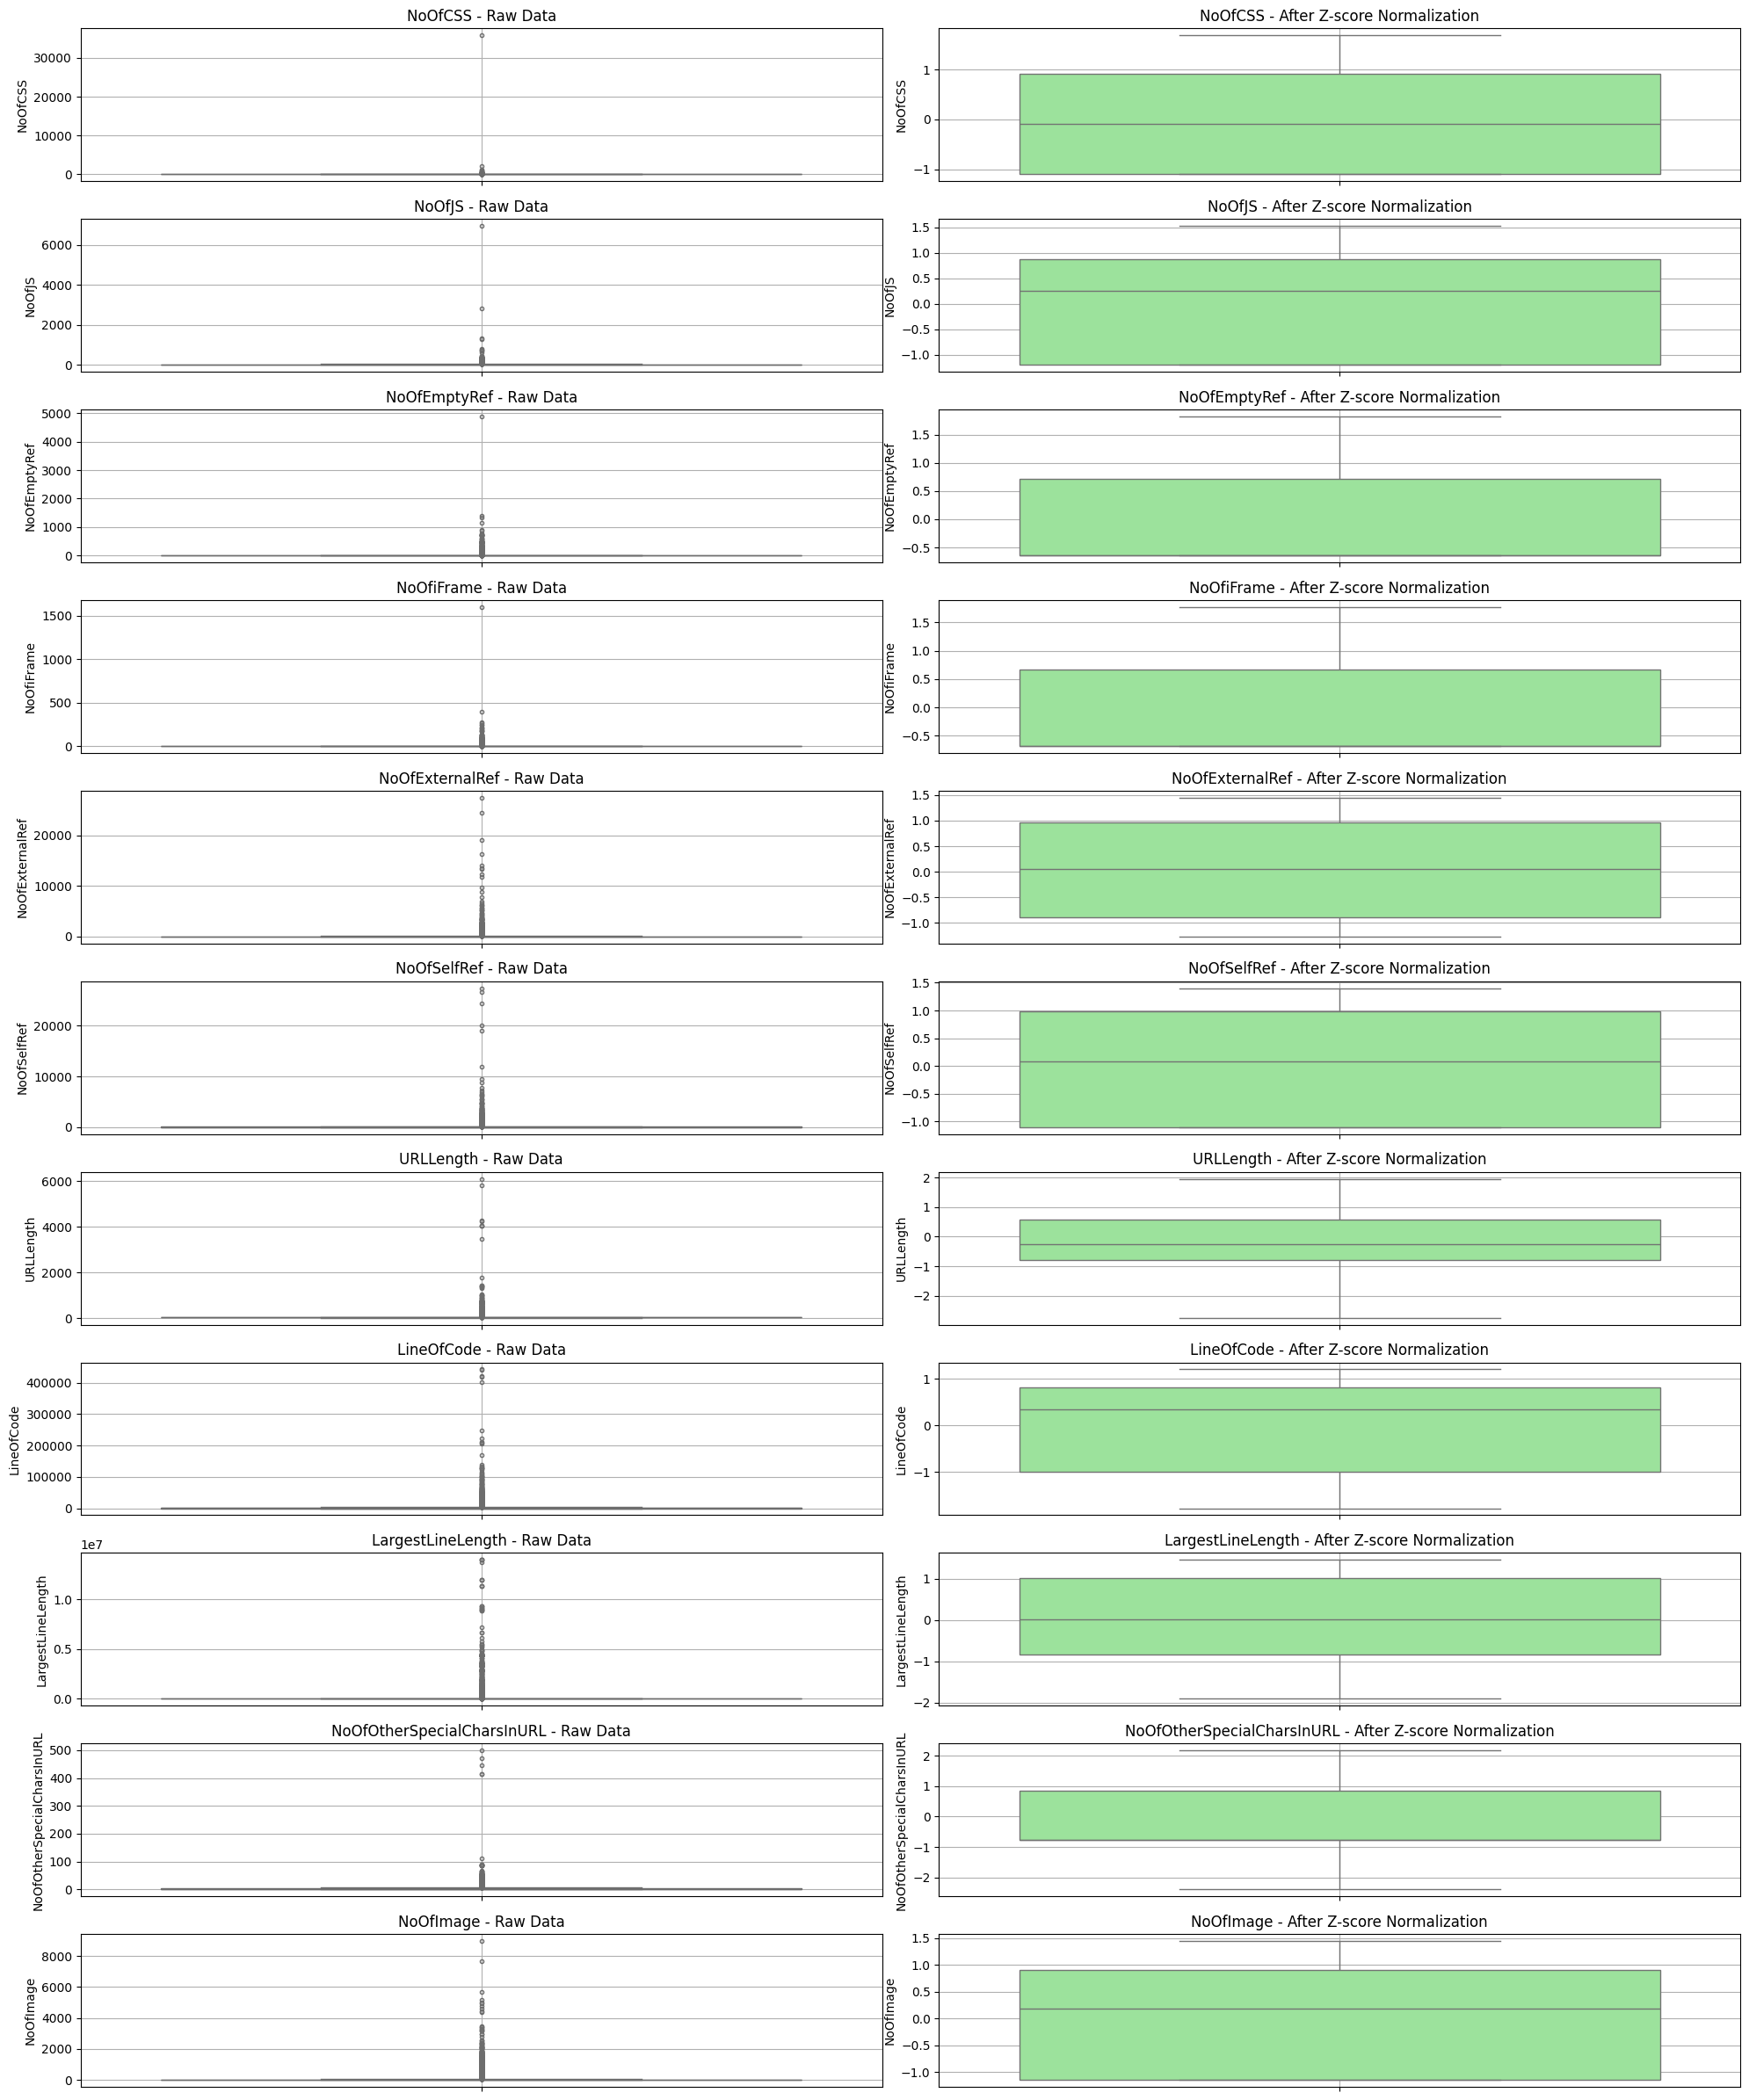

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Features on which z-score was applied
z_scaled_features = [
    'NoOfCSS', 'NoOfJS', 'NoOfEmptyRef', 'NoOfiFrame',
    'NoOfExternalRef', 'NoOfSelfRef', 'URLLength',
    'LineOfCode', 'LargestLineLength',
    'NoOfOtherSpecialCharsInURL', 'NoOfImage'
]

plt.figure(figsize=(20, 24))
for i, col in enumerate(z_scaled_features):
    plt.subplot(len(z_scaled_features), 2, 2*i + 1)
    sns.boxplot(y=original_df[col], color='salmon', fliersize=3)
    plt.title(f"{col} - Raw Data")
    plt.grid(True)

    plt.subplot(len(z_scaled_features), 2, 2*i + 2)
    sns.boxplot(y=df[col], color='lightgreen', fliersize=3)
    plt.title(f"{col} - After Z-score Normalization")
    plt.grid(True)

plt.tight_layout()
plt.show()


In [19]:
#FEATURE ENGINEERING

#Preprocessing and feature scaling already done

In [18]:
df.to_csv("preprocessed_phishing_dataset.csv", index=False)


In [24]:
from google.colab import files
uploaded = files.upload()


Saving preprocessed_ phishingdataset.xlsx to preprocessed_ phishingdataset.xlsx


In [28]:
import pandas as pd

# Load the Excel file
df = pd.read_csv('/content/preprocessed_phishing_dataset.csv')

# Confirm
print(" Dataset loaded")
print(df.shape)
df.head()


 Dataset loaded
(235795, 56)


,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,0.241712,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,0.995424,1.686678,1.312465,1.118007,-0.641842,1.377197,1
1,31372.txt,https://www.uni-mainz.de,-0.794882,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,1.222763,1.007706,0.439152,0.609022,-0.641842,1.446960,1
2,597387.txt,https://www.voicefmradio.co.uk,0.009162,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,0.296487,-0.094089,0.351241,0.642528,1.519305,-0.284094,1
3,554095.txt,https://www.sfnmjournal.com,-0.370479,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,0,1,-0.314376,1.686678,0.868590,0.352641,0.721690,0.631734,1
4,151578.txt,https://www.rewildingargentina.org,0.460158,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,1.443448,1.437822,1.452823,0.887733,0.721690,1.172601,1


In [ ]:
#LOGISTIC REGRESSION

ChatGPT said:
Logistic Regression is a statistical method used for binary classification problems — where the output is either 0 or 1 (e.g., spam or not spam, disease or no disease). Instead of predicting exact values like linear regression, it predicts the probability that a given input belongs to a certain class using the sigmoid function, which outputs values between 0 and 1

In [4]:
from google.colab import files
import pandas as pd

# Upload the CSV file
uploaded = files.upload()




Saving preprocessed_ phishingdataset.xlsx to preprocessed_ phishingdataset (1).xlsx


In [11]:
import pandas as pd

# Just read it directly from the known path
df = pd.read_csv('/content/preprocessed_ phishingdataset.csv', encoding='ISO-8859-1')


# Check loaded structure
print("Shape:", df.shape)
df.head()


Shape: (235795, 56)


,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,0.241712,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,0.995424,1.686678,1.312465,1.118007,-0.641842,1.377197,1
1,31372.txt,https://www.uni-mainz.de,-0.794882,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,1.222763,1.007706,0.439152,0.609022,-0.641842,1.446960,1
2,597387.txt,https://www.voicefmradio.co.uk,0.009162,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,0.296487,-0.094089,0.351241,0.642528,1.519305,-0.284094,1
3,554095.txt,https://www.sfnmjournal.com,-0.370479,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,0,1,-0.314376,1.686678,0.868590,0.352641,0.721690,0.631734,1
4,151578.txt,https://www.rewildingargentina.org,0.460158,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,1.443448,1.437822,1.452823,0.887733,0.721690,1.172601,1


In [ ]:
#Splitting the dataset for training and testing

In [44]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(columns=['label'], errors='ignore')
y = df['label']

# Drop non-numeric or problematic columns if any accidentally remain
X = X.select_dtypes(include=['int64', 'float64'])

# Confirm shapes
print("Features shape:", X.shape)
print("Target shape:", y.shape)

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Features shape: (235795, 50)
Target shape: (235795,)
Training set size: (188636, 50)
Testing set size: (47159, 50)


🔍 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159

 Accuracy: 0.9999575902796921
 Precision: 0.9999260272959278
 Recall: 1.0
 F1 Score: 0.999963012279923
 ROC-AUC Score: 0.9999999889716493


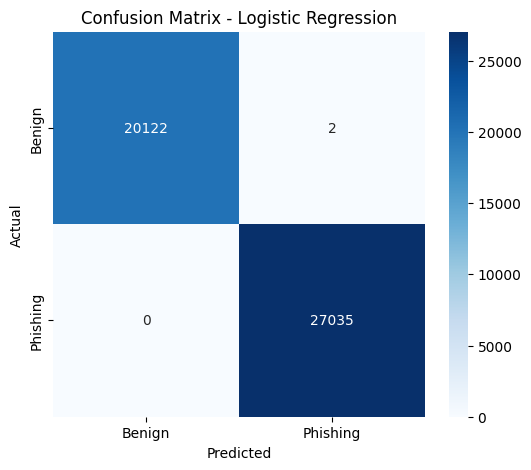

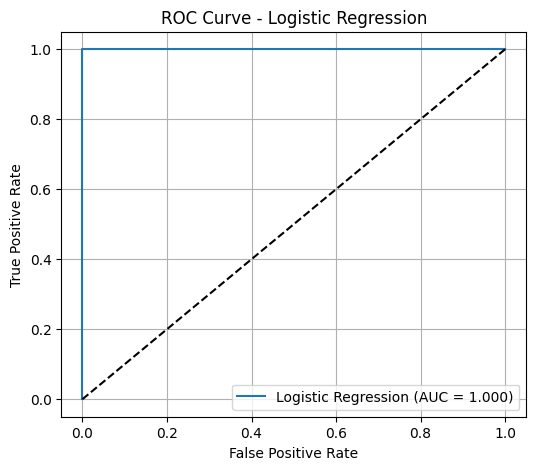

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Train the model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]  # For ROC-AUC

# Evaluation
print(" Classification Report:\n")
print(classification_report(y_test, y_pred))

print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" Precision:", precision_score(y_test, y_pred))
print(" Recall:", recall_score(y_test, y_pred))
print(" F1 Score:", f1_score(y_test, y_pred))
print(" ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Benign", "Phishing"], yticklabels=["Benign", "Phishing"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.3f})'.format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#getting AUC needs to be cross checked

In [ ]:
#Using SVM

Support Vector Machine (SVM) is a powerful supervised learning algorithm used for both classification and regression tasks. It works by finding the optimal hyperplane that best separates data points of different classes. The key idea is to maximize the margin between the closest points of the classes, called support vectors, and the decision boundary. If the data is not linearly separable, SVM uses kernel functions (like RBF or polynomial) to project it into higher-dimensional space where a linear separator can be found. SVM performs well in high-dimensional spaces and is effective when there is a clear margin of separation between classes, but it can be computationally expensive on large datasets and sensitive to feature scaling.

Features shape: (235795, 50)
Target shape: (235795,)
Training set size: (188636, 50)
Testing set size: (47159, 50)
🔍 Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     20124
           1       0.99      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159

 Accuracy: 0.9967344515362921
 Precision: 0.9943359446835117
 Recall: 1.0
 F1 Score: 0.9971599291826497
 ROC-AUC Score: 0.999999463286933


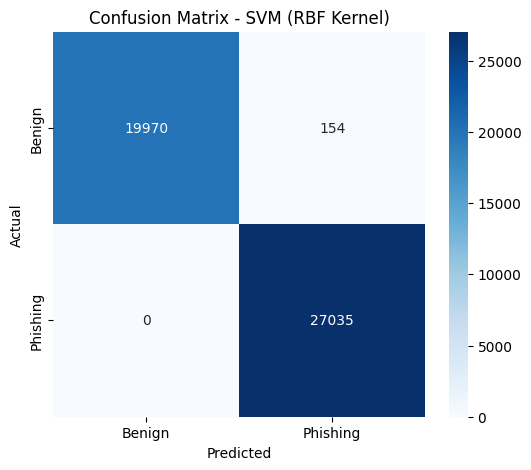

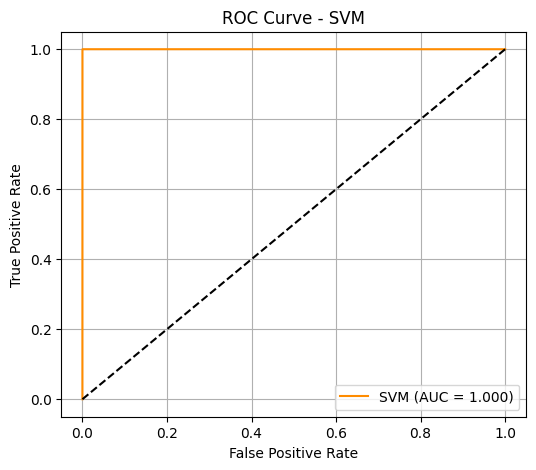

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

#  Train-Test Split
# Separate features and target
X = df.drop(columns=['label'], errors='ignore')
y = df['label']

# Drop non-numeric or problematic columns
X = X.select_dtypes(include=['int64', 'float64'])

# Confirm shapes
print("Features shape:", X.shape)
print("Target shape:", y.shape)

# Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# : Train SVM Model
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)

# Predict
y_pred = svm.predict(X_test)
y_prob = svm.predict_proba(X_test)[:, 1]  # for ROC-AUC

#  Evaluation
print(" Classification Report:\n")
print(classification_report(y_test, y_pred))

print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" Precision:", precision_score(y_test, y_pred))
print(" Recall:", recall_score(y_test, y_pred))
print(" F1 Score:", f1_score(y_test, y_pred))
print(" ROC-AUC Score:", roc_auc_score(y_test, y_prob))

#  Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Benign", "Phishing"], yticklabels=["Benign", "Phishing"])
plt.title("Confusion Matrix - SVM (RBF Kernel)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# : ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label='SVM (AUC = {:.3f})'.format(roc_auc_score(y_test, y_prob)), color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Again with AUC = 1 needs to be verified

In [ ]:
#Random Forest Classifier


Random Forest Classifier is a popular ensemble learning algorithm used for classification tasks. It works by constructing multiple decision trees during training and combining their predictions through majority voting. Each tree is trained on a random subset of the data and a random subset of features, which helps ensure diversity among the trees and reduces the risk of overfitting. By aggregating the results from many weak learners (individual trees), the Random Forest achieves strong overall performance. It is known for its high accuracy, robustness to noise, and ability to handle both numerical and categorical features, making it suitable for a wide range of classification problems.

🔍 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159

 Accuracy: 0.999978795139846
 Precision: 0.999963012279923
 Recall: 1.0
 F1 Score: 0.9999815057979323
 ROC-AUC Score: 1.0


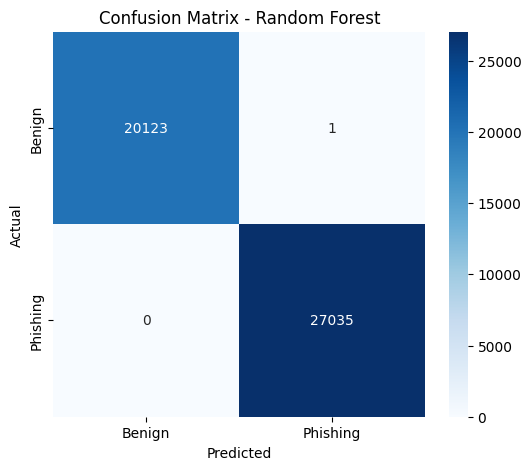

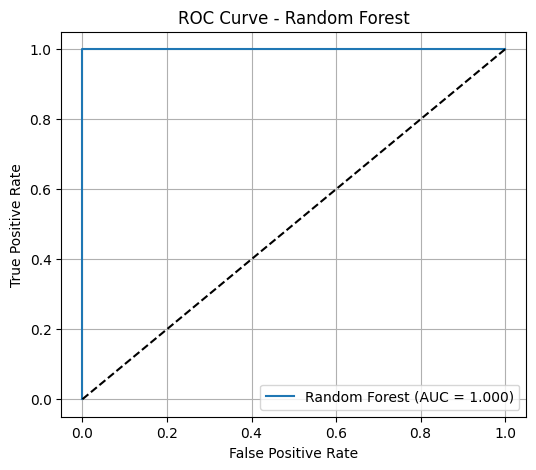

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]  # For ROC-AUC

# Evaluation
print("🔍 Classification Report:\n")
print(classification_report(y_test, y_pred))

print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" Precision:", precision_score(y_test, y_pred))
print(" Recall:", recall_score(y_test, y_pred))
print(" F1 Score:", f1_score(y_test, y_pred))
print(" ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Benign", "Phishing"], yticklabels=["Benign", "Phishing"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.3f})'.format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Since we have same AUC, consider feature importance

📊 Top 20 Most Important Features (Random Forest):


,Feature,Importance
3,URLSimilarityIndex,0.223883
49,NoOfExternalRef,0.135483
22,LineOfCode,0.126784
44,NoOfImage,0.104537
47,NoOfSelfRef,0.074716
46,NoOfJS,0.074467
43,HasCopyrightInfo,0.053069
23,LargestLineLength,0.045457
36,HasSocialNet,0.040124
19,NoOfOtherSpecialCharsInURL,0.023898


/tmp/ipython-input-18-389087900.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis')


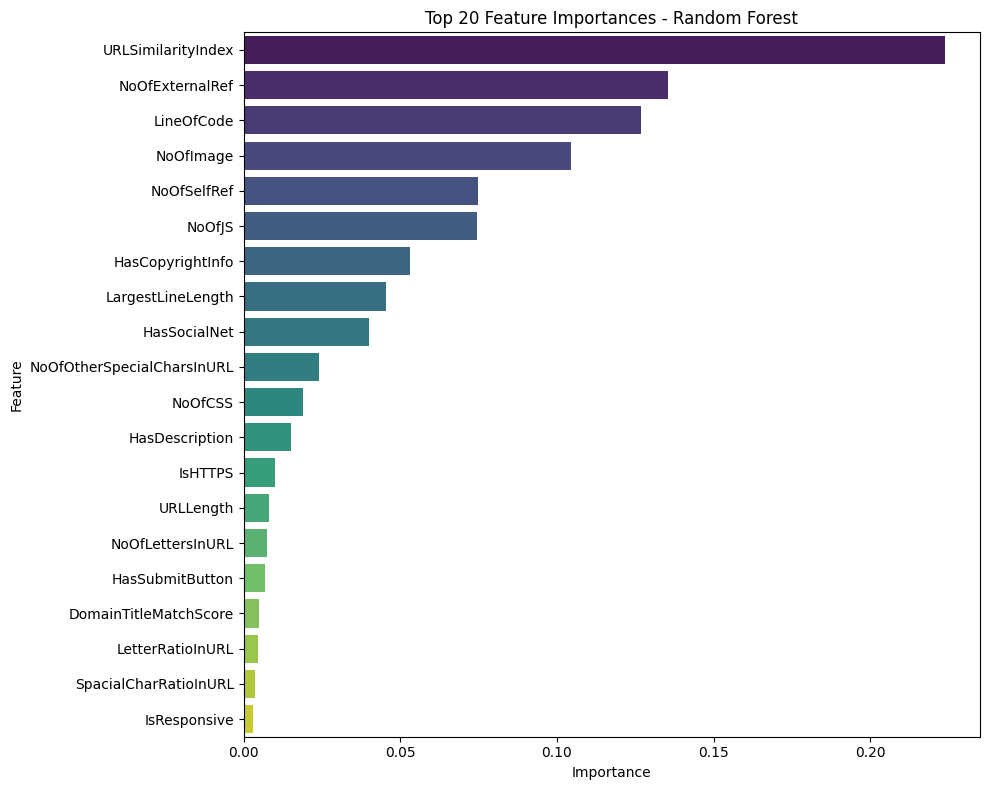

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained model
importances = rf_model.feature_importances_

# Create DataFrame with feature names
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display top features
print("📊 Top 20 Most Important Features (Random Forest):")
display(feature_importance_df.head(20))

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis')
plt.title('Top 20 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()


In [ ]:
#with 10 important features taking randomly for solving overfitting


Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20124
           1       1.00      0.99      1.00     27035

    accuracy                           0.99     47159
   macro avg       0.99      0.99      0.99     47159
weighted avg       0.99      0.99      0.99     47159

 Accuracy: 0.9946351703810513
 Precision: 0.9957793409848205
 Recall: 0.9948585167375624
 F1 Score: 0.9953187158849107
 ROC-AUC Score: 0.9997883953591671


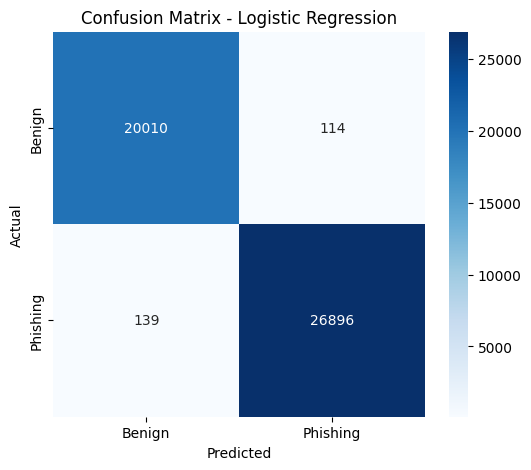

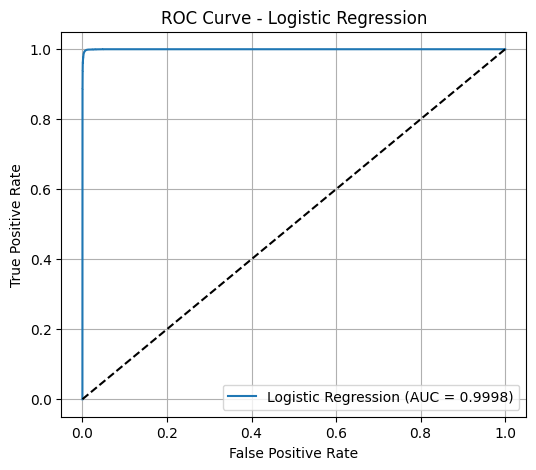

In [22]:
# Use only selected realistic features
selected_features = [
    'NoOfExternalRef', 'LineOfCode', 'NoOfImage', 'NoOfJS',
    'LargestLineLength', 'NoOfCSS', 'URLLength', 'IsHTTPS',
    'LetterRatioInURL', 'HasSubmitButton'
]
X = df[selected_features]
y = df['label']

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Choose your model (Logistic Regression here)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

#  Predict and Evaluate
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

#   Print Metrics
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" Precision:", precision_score(y_test, y_pred))
print(" Recall:", recall_score(y_test, y_pred))
print(" F1 Score:", f1_score(y_test, y_pred))
print(" ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=["Benign", "Phishing"], yticklabels=["Benign", "Phishing"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.4f})'.format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#better generalization than before

In [ ]:
#Repeating with svm


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159

 Accuracy: 0.9982187917470684
 Precision: 0.9981884727716367
 Recall: 0.9987053819123358
 F1 Score: 0.9984468604393166
 ROC-AUC Score: 0.9999620422549786


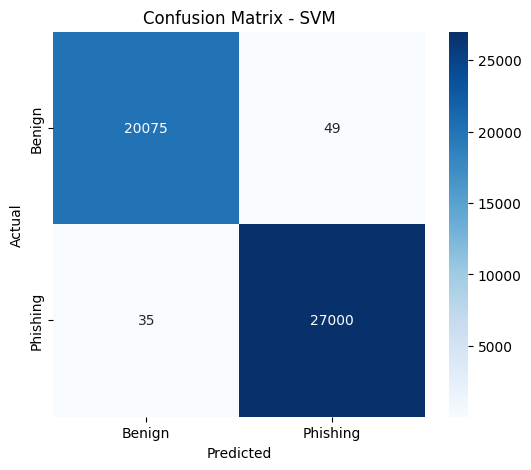

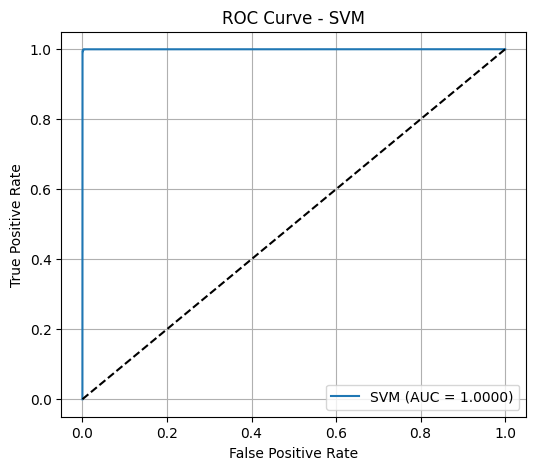

In [24]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Use only selected realistic features
selected_features = [
    'NoOfExternalRef', 'LineOfCode', 'NoOfImage', 'NoOfJS',
    'LargestLineLength', 'NoOfCSS', 'URLLength', 'IsHTTPS',
    'LetterRatioInURL', 'HasSubmitButton'
]
X = df[selected_features]
y = df['label']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Choose your model (SVM with RBF kernel)
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

#   Predict and Evaluate
y_pred = svm_model.predict(X_test_scaled)
y_prob = svm_model.predict_proba(X_test_scaled)[:, 1]

#   Print Metrics
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" Precision:", precision_score(y_test, y_pred))
print(" Recall:", recall_score(y_test, y_pred))
print(" F1 Score:", f1_score(y_test, y_pred))
print(" ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=["Benign", "Phishing"], yticklabels=["Benign", "Phishing"])
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label='SVM (AUC = {:.4f})'.format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.grid(True)
plt.show()



📊 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159

 Accuracy: 0.9989821667126105
 Precision: 0.9991122618827446
 Recall: 0.9991122618827446
 F1 Score: 0.9991122618827446
 ROC-AUC Score: 0.9999417032192159


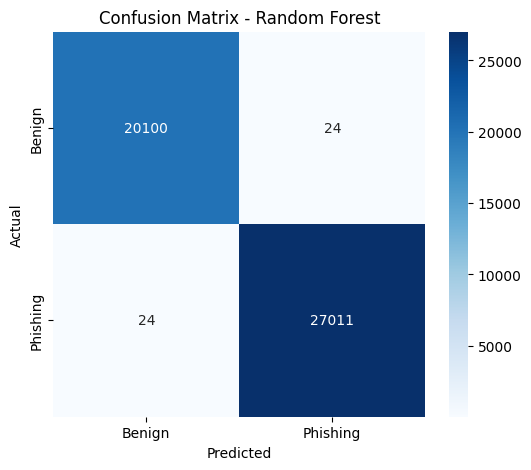

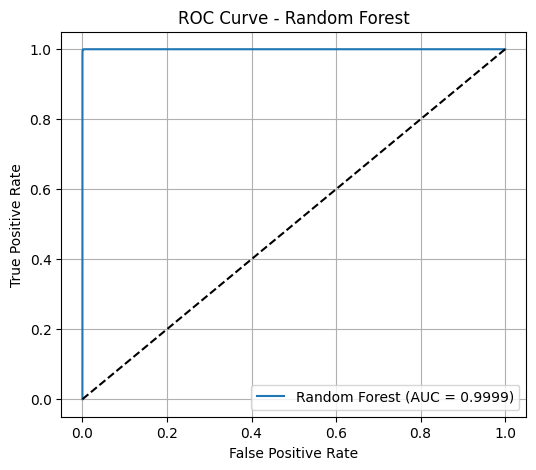

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Feature selection
selected_features = [
    'NoOfExternalRef', 'LineOfCode', 'NoOfImage', 'NoOfJS',
    'LargestLineLength', 'NoOfCSS', 'URLLength', 'IsHTTPS',
    'LetterRatioInURL', 'HasSubmitButton'
]
X = df[selected_features]
y = df['label']

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

#  Predict
y_pred = rf_model.predict(X_test_scaled)
y_prob = rf_model.predict_proba(X_test_scaled)[:, 1]

#  Metrics
print("\n Classification Report:\n")
print(classification_report(y_test, y_pred))

print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" Precision:", precision_score(y_test, y_pred))
print(" Recall:", recall_score(y_test, y_pred))
print(" F1 Score:", f1_score(y_test, y_pred))
print(" ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=["Benign", "Phishing"], yticklabels=["Benign", "Phishing"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.4f})'.format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#with Decision tree Classifier


DecisionTreeClassifier is a supervised learning algorithm used for classification tasks. It works by splitting the dataset into subsets based on feature values, creating a tree-like model of decisions. At each internal node, the algorithm chooses the feature and threshold that best separates the classes, aiming to maximize information gain or reduce impurity (like Gini or entropy). The process continues recursively until the model reaches a stopping condition, such as maximum depth or pure leaf nodes. Decision trees are easy to understand and interpret, can handle both numerical and categorical data, and require little data preprocessing. However, they are prone to overfitting if not properly controlled with techniques like pruning or limiting tree depth


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159

 Accuracy: 0.9974978265018343
 Precision: 0.9980387077674574
 Recall: 0.9975957092657666
 F1 Score: 0.9978171593473676
 ROC-AUC Score: 0.9974810190137221


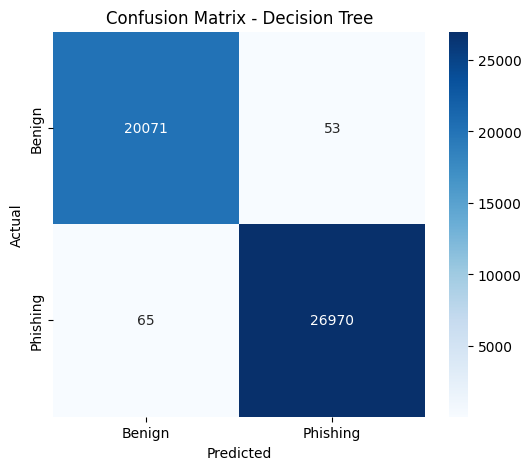

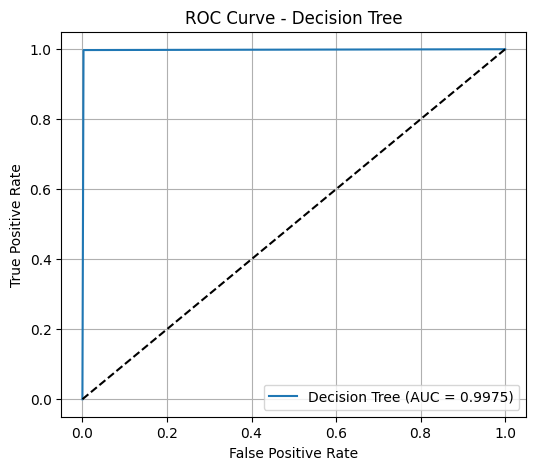

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Selection
selected_features = [
    'NoOfExternalRef', 'LineOfCode', 'NoOfImage', 'NoOfJS',
    'LargestLineLength', 'NoOfCSS', 'URLLength', 'IsHTTPS',
    'LetterRatioInURL', 'HasSubmitButton'
]
X = df[selected_features]
y = df['label']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Predict and Evaluate
y_pred = dt_model.predict(X_test_scaled)
y_prob = dt_model.predict_proba(X_test_scaled)[:, 1]

#  Print Metrics
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" Precision:", precision_score(y_test, y_pred))
print(" Recall:", recall_score(y_test, y_pred))
print(" F1 Score:", f1_score(y_test, y_pred))
print(" ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=["Benign", "Phishing"], yticklabels=["Benign", "Phishing"])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#  ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label='Decision Tree (AUC = {:.4f})'.format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#GradientBoostingClassifier

GradientBoostingClassifier is a powerful ensemble learning algorithm used for classification tasks. It builds the model in a stage-wise fashion by combining multiple weak learners—usually shallow decision trees—into a strong predictor. Unlike random forests, which train trees in parallel, gradient boosting trains trees sequentially, with each new tree trying to correct the errors made by the previous ones. This is done by minimizing a loss function using gradient descent techniques. Gradient boosting is highly effective for complex datasets and often delivers superior accuracy. However, it can be sensitive to overfitting and may require careful tuning of parameters like learning rate, number of trees, and tree depth.


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159

 Accuracy: 0.9981763820267605
 Precision: 0.9984463433581179
 Recall: 0.9983724801183651
 F1 Score: 0.9984094103721239
 ROC-AUC Score: 0.9999750308950055


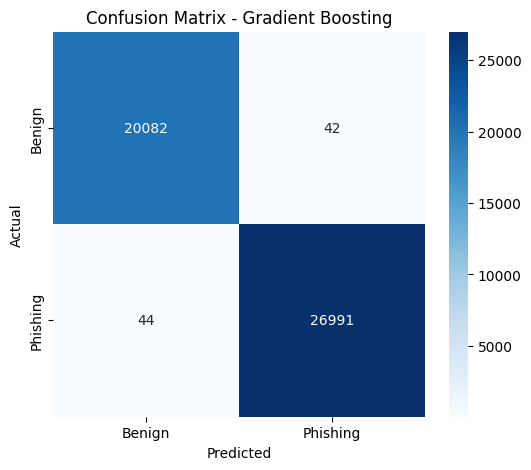

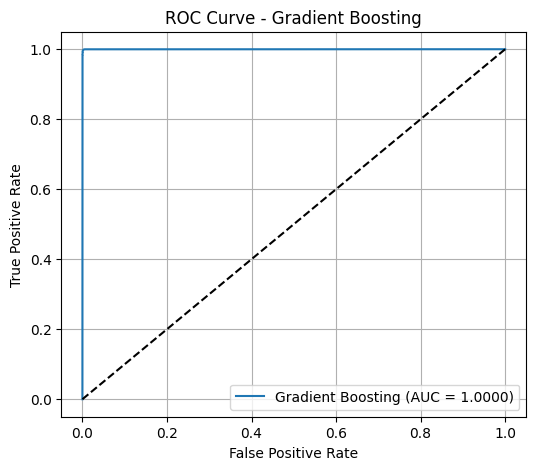

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


#  Use only selected realistic features
selected_features = [
    'NoOfExternalRef', 'LineOfCode', 'NoOfImage', 'NoOfJS',
    'LargestLineLength', 'NoOfCSS', 'URLLength', 'IsHTTPS',
    'LetterRatioInURL', 'HasSubmitButton'
]
X = df[selected_features]
y = df['label']

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#  Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Predict
y_pred = gb_model.predict(X_test_scaled)
y_prob = gb_model.predict_proba(X_test_scaled)[:, 1]

# . Evaluation Metrics
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" Precision:", precision_score(y_test, y_pred))
print(" Recall:", recall_score(y_test, y_pred))
print(" F1 Score:", f1_score(y_test, y_pred))
print(" ROC-AUC Score:", roc_auc_score(y_test, y_prob))

#. Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=["Benign", "Phishing"], yticklabels=["Benign", "Phishing"])
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#  ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label='Gradient Boosting (AUC = {:.4f})'.format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#KNN

K-Nearest Neighbors (KNN) is a simple, non-parametric, and instance-based supervised learning algorithm used for classification and regression. In classification, it works by finding the K closest training samples (neighbors) to a new input based on a distance metric (usually Euclidean distance), and assigning the most common class among those neighbors. KNN makes no assumptions about the underlying data distribution, making it flexible but also sensitive to the choice of K and to feature scaling. While it can perform well on small datasets with clear class boundaries, KNN becomes computationally expensive on large datasets and can be affected by noisy or irrelevant features.


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159

 Accuracy: 0.9980915625861447
 Precision: 0.9976360211280612
 Recall: 0.9990382837063067
 F1 Score: 0.9983366600133067
 ROC-AUC Score: 0.9994282664053976


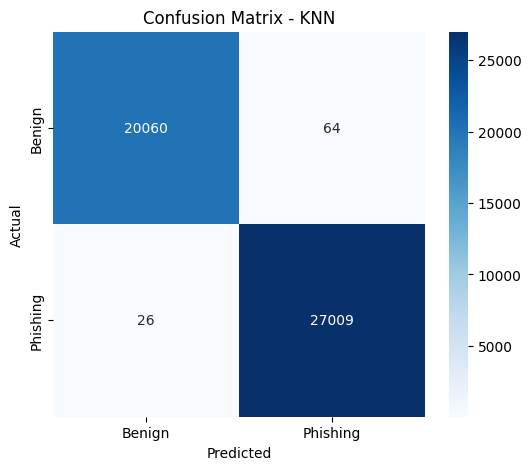

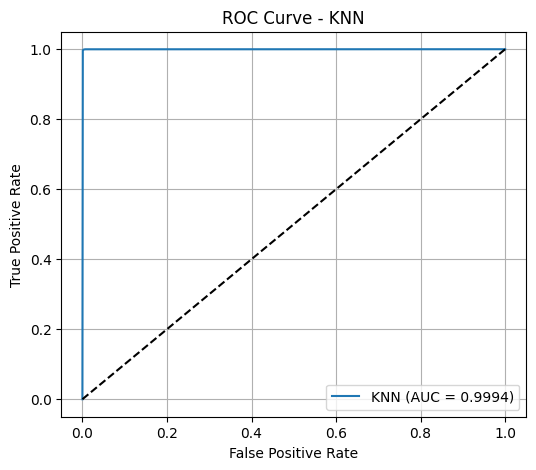

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

#  Use same 10 selected features
selected_features = [
    'NoOfExternalRef', 'LineOfCode', 'NoOfImage', 'NoOfJS',
    'LargestLineLength', 'NoOfCSS', 'URLLength', 'IsHTTPS',
    'LetterRatioInURL', 'HasSubmitButton'
]
X = df[selected_features]
y = df['label']

#  Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)
y_prob = knn_model.predict_proba(X_test_scaled)[:, 1]

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" Precision:", precision_score(y_test, y_pred))
print(" Recall:", recall_score(y_test, y_pred))
print(" F1 Score:", f1_score(y_test, y_pred))
print(" ROC-AUC Score:", roc_auc_score(y_test, y_prob))


plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=["Benign", "Phishing"], yticklabels=["Benign", "Phishing"])
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label='KNN (AUC = {:.4f})'.format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:50:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159

 Accuracy: 0.9993002396149198
 Precision: 0.9993342702862638
 Recall: 0.9994451636767153
 F1 Score: 0.9993897139052762
 ROC-AUC Score: 0.9999939776014932


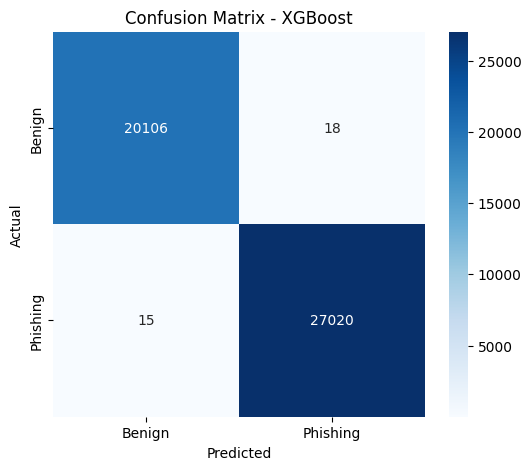

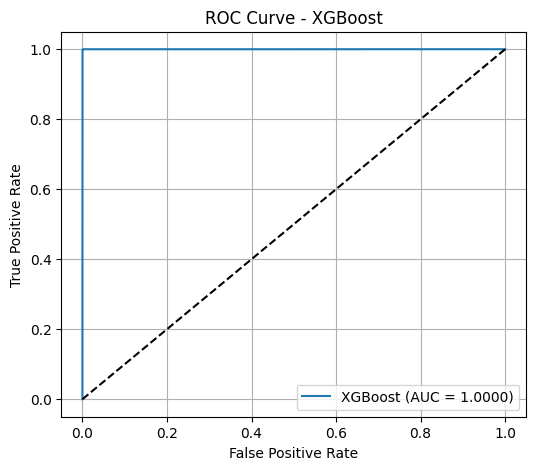

In [29]:
# Import required libraries
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# . Use selected features
selected_features = [
    'NoOfExternalRef', 'LineOfCode', 'NoOfImage', 'NoOfJS',
    'LargestLineLength', 'NoOfCSS', 'URLLength', 'IsHTTPS',
    'LetterRatioInURL', 'HasSubmitButton'
]

X = df[selected_features]
y = df['label']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Train XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)


y_pred = xgb_model.predict(X_test_scaled)
y_prob = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" Precision:", precision_score(y_test, y_pred))
print(" Recall:", recall_score(y_test, y_pred))
print(" F1 Score:", f1_score(y_test, y_pred))
print(" ROC-AUC Score:", roc_auc_score(y_test, y_prob))


plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=["Benign", "Phishing"], yticklabels=["Benign", "Phishing"])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label='XGBoost (AUC = {:.4f})'.format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Cross-Validation - to cross check the results

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM (RBF Kernel)": SVC(kernel='rbf', probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Perform 5-fold cross-validation for ROC-AUC
print("🔁 5-Fold Cross-Validation (ROC-AUC Scores):\n")
for name, model in models.items():
    auc_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
    print(f"{name:25}: Mean AUC = {auc_scores.mean():.5f} ± {auc_scores.std():.5f}")


🔁 5-Fold Cross-Validation (ROC-AUC Scores):

Logistic Regression      : Mean AUC = 0.99977 ± 0.00004
SVM (RBF Kernel)         : Mean AUC = 0.99996 ± 0.00002
Decision Tree            : Mean AUC = 0.99759 ± 0.00037
Random Forest            : Mean AUC = 0.99997 ± 0.00003
Gradient Boosting        : Mean AUC = 0.99998 ± 0.00001
K-Nearest Neighbors      : Mean AUC = 0.99938 ± 0.00016


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:27:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:27:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:27:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:27:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:27:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost                  : Mean AUC = 0.99999 ± 0.00001


Among the various machine learning models evaluated, XGBoost emerged as the best performer, achieving the highest accuracy (99.93%), F1-score, and ROC-AUC (0.99999), along with minimal variance across folds—indicating excellent generalization. Gradient Boosting and Random Forest also performed exceptionally well, closely following XGBoost in all metrics. Logistic Regression, despite its simplicity, demonstrated strong predictive ability with a ROC-AUC of 0.99978, making it a solid baseline, especially when model interpretability is desired. In contrast, K-Nearest Neighbors and Decision Tree, although showing high AUC scores, were relatively less stable and more prone to overfitting. Overall, XGBoost is recommended for highest performance, while Logistic Regression remains valuable for its simplicity and explainability.